In [111]:
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

In [112]:
# ファイルの読み込み
'''
stock_data = []
stock_data_file = open("stock_price.txt", "r")
for line in stock_data_file:
    line = line.rstrip()
    stock_data.append(float(line))
stock_data_file.close()
'''

'\nstock_data = []\nstock_data_file = open("stock_price.txt", "r")\nfor line in stock_data_file:\n    line = line.rstrip()\n    stock_data.append(float(line))\nstock_data_file.close()\n'

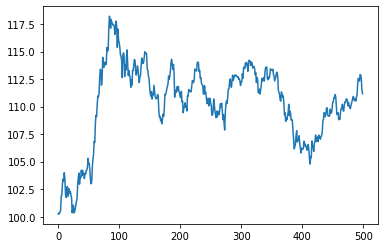

In [113]:
csv_data = pd.read_csv('usd_jpy.csv', sep=',')
close_data = csv_data['close']
stock_data = np.array(close_data)
plt.plot(stock_data)
#print(stock_data)

In [114]:
count_s = len(stock_data)
print (count_s)

500


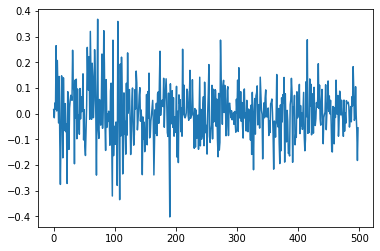

In [115]:
# 正規化
# 株価の上昇率を算出、おおよそ-1.0-1.0の範囲に収まるように調整
modified_data = []
for i in range(1, count_s):
    modified_data.append(float(stock_data[i] - stock_data[i-1])/float(stock_data[i-1]) * 20)
#print (modified_data)
plt.plot(modified_data)
#print(modified_data)

In [116]:
count_m = len(modified_data)
print (count_m)

499


In [137]:
# 前日までの4連続の上昇率のデータ
successive_data = []
# 正解値 価格上昇: 1 価格低下: 0
answers = []
for i in range(4, count_m):
    successive_data.append([modified_data[i-4], modified_data[i-3], modified_data[i-2], modified_data[i-1]])
    #if modified_data[i] > 0:
    if modified_data[i] > 0:
        answers.append(1)
    else:
        answers.append(0)
#print (successive_data)
#plt.plot(answers)
print(answers)

[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 

In [138]:
#print (answers)
col=0
for i in answers:
    if answers[i]==1:
        col=col+1

print(col) 

495


In [139]:
# データ数
n = len(successive_data)
m = len(answers)
print (n,m)

495 495


In [140]:
# 線形サポートベクターマシーン
clf = svm.LinearSVC()
# サポートベクターマシーンによる訓練 （データの75%を訓練に使用）
clf.fit(successive_data[:n*75//100], answers[:n*75//100])

# テスト用データ
# 正解
expected = answers[-n*25//100:]
# 予測
predicted = clf.predict(successive_data[-n*25//100:])

# 末尾の10個を比較
print (expected[-100:])
print (list(predicted[-100:]))

[0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1]


In [141]:
# 正解率の計算
correct = 0.0
wrong = 0.0
for i in range(n*25//100):
    if expected[i] == predicted[i]:
        correct += 1
    else:
        wrong += 1
print ("正解率: " + str(correct / (correct+wrong) * 100) + "%")

正解率: 47.15447154471545%
